In [1]:
from ds_functions import *
from ds_settings import *

random_state = 1

In [2]:
files = [train_file, maxrgb_file, alpha_file, green_yellow_file, colorized_file]

data = get_data(pickle_file, read_pickle=use_pickle)

# Set features and target
features = list(data.columns)[2:]

target = 'class'

max_features = int(np.round(np.sqrt(len(features))))

In [3]:
rf_model = sk_cls(RandomForestClassifier(n_estimators=650, 
                                        max_features=650,
                                        n_jobs=4),
                 data=data, 
                 X=features, y=target, cv=None)
rf_model.run()

Score:
 0.7305263157894737
Classification Report:
                            precision    recall  f1-score   support

              Black-grass       0.57      0.15      0.24        26
                 Charlock       0.86      0.94      0.90        33
                 Cleavers       0.95      0.67      0.78        30
         Common Chickweed       0.73      0.91      0.81        76
             Common wheat       0.80      0.18      0.30        22
                  Fat Hen       0.62      0.70      0.66        37
         Loose Silky-bent       0.61      0.95      0.74        64
                    Maize       1.00      0.48      0.65        23
        Scentless Mayweed       0.68      0.82      0.74        61
          Shepherds Purse       1.00      0.22      0.36        18
Small-flowered Cranesbill       0.83      0.90      0.86        49
               Sugar beet       0.85      0.64      0.73        36

              avg / total       0.76      0.73      0.70       475



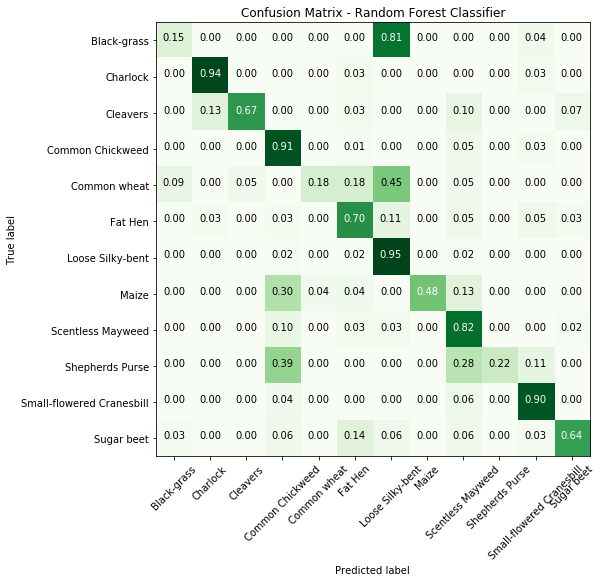

In [5]:
rf_model.show(title='Confusion Matrix - Random Forest Classifier')

In [10]:
X_tr, X_ts, y_tr, y_ts = train_test_split(data.iloc[:, 2:], 
                                          data.iloc[:, 0], 
                                          test_size=0.1, 
                                          random_state=random_state)

In [52]:
# I'll also try a grid search 

max_feat = [int(np.round(np.sqrt(len(features)) * i)) for i in [1, 1.25]]

params = {
    'n_estimators':[600, 700], 
    'max_features': max_feat, 
    'n_jobs':[4],
    'min_samples_leaf':[1,2,3]
}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=4)

In [ ]:
rf_grid.fit(X_tr, y_tr)

0.7061988304093567
{'max_features': 606, 'min_samples_leaf': 1, 'n_estimators': 600, 'n_jobs': 4}
                           precision    recall  f1-score   support

              Black-grass       0.86      0.17      0.29        35
                 Charlock       0.80      0.83      0.81        29
                 Cleavers       0.85      0.77      0.81        30
         Common Chickweed       0.66      0.91      0.76        67
             Common wheat       1.00      0.12      0.21        25
                  Fat Hen       0.61      0.77      0.68        39
         Loose Silky-bent       0.51      0.93      0.66        61
                    Maize       0.92      0.60      0.73        20
        Scentless Mayweed       0.71      0.70      0.71        57
          Shepherds Purse       0.50      0.07      0.12        15
Small-flowered Cranesbill       0.91      0.85      0.88        59
               Sugar beet       0.86      0.66      0.75        38

              avg / total    

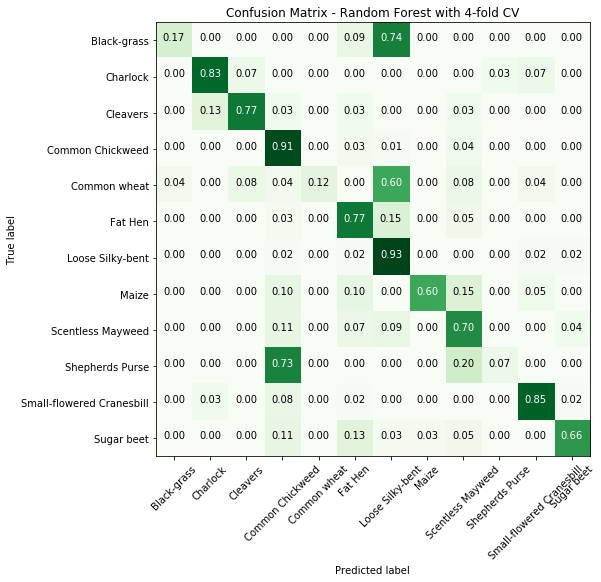

In [13]:

print(rf_grid.best_score_)
print(rf_grid.best_params_)
result = rf_grid.cv_results_
grid_pred = rf_grid.best_estimator_.predict(X_ts)
print(classification_report(y_ts, grid_pred))
score = accuracy_score(y_ts, grid_pred)
print(score)
cm_plot(confusion_matrix(y_ts, grid_pred), classes=sorted(data['class'].unique()), 
       cmap=plt.cm.Greens, cbar=False, normalize=True, 
       title='Confusion Matrix - Random Forest with 4-fold CV')
plt.show()
# save the grid search results


In [55]:
# That's pretty good. i'll save this model.

rf_pkl_filename = 'rf_grid_cv.pkl_model'
    
save_model(rf_grid, rf_pkl_filename)

In [3]:
etc_model = sk_cls(ExtraTreesClassifier(n_estimators=600, 
                                      max_features=700, 
                                      n_jobs=4),
                 data=data, 
                 X=features, y=target, cv=None)
etc_model.run()

Score:
 0.7221052631578947
Classification Report:
                            precision    recall  f1-score   support

              Black-grass       0.56      0.18      0.27        28
                 Charlock       0.87      0.82      0.85        40
                 Cleavers       0.88      0.90      0.89        31
         Common Chickweed       0.74      0.94      0.83        52
             Common wheat       0.83      0.20      0.32        25
                  Fat Hen       0.71      0.84      0.77        43
         Loose Silky-bent       0.61      0.88      0.72        74
                    Maize       0.92      0.55      0.69        22
        Scentless Mayweed       0.56      0.59      0.58        54
          Shepherds Purse       1.00      0.33      0.50        24
Small-flowered Cranesbill       0.78      0.98      0.87        46
               Sugar beet       0.83      0.69      0.76        36

              avg / total       0.74      0.72      0.70       475



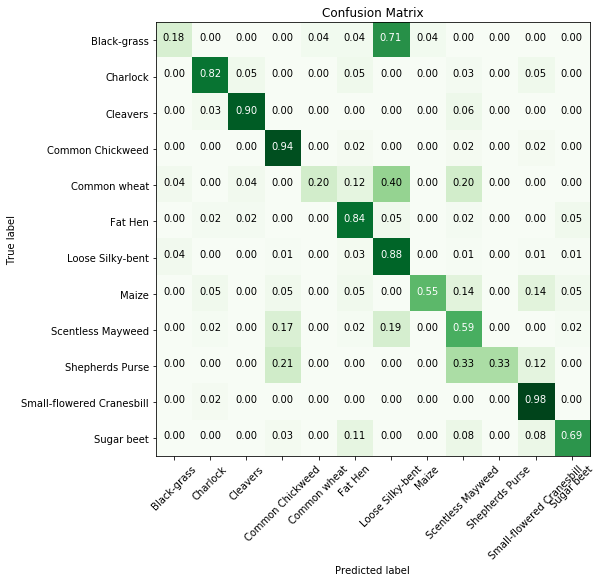

In [6]:
etc_model.show(title='Confusion Matrix - Extra Trees Classifier')

In [12]:
X_tr, X_ts, y_tr, y_ts = train_test_split(data.iloc[:, 2:], 
                                          data.iloc[:, 0], 
                                          test_size=0.1, 
                                          random_state=random_state)

max_feat = [int(np.round(np.sqrt(len(features)) * i)) for i in [0.8, 1, 1.2]]

In [26]:
# attempt a grid search using ETC

params = {
    'n_estimators':[600, 750, 900], 
    'max_features': max_feat, 
    'n_jobs':[4]
}

# similar grid search setup to RF. Use 5-fold cross-validation

etc_grid = GridSearchCV(ExtraTreesClassifier(), param_grid=params, cv=5)

In [27]:
etc_grid.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [600, 750, 900], 'max_features': [485, 606, 727], 'n_jobs': [4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

0.7256140350877193
{'max_features': 727, 'n_estimators': 900, 'n_jobs': 4}
                           precision    recall  f1-score   support

              Black-grass       0.83      0.14      0.24        35
                 Charlock       0.77      0.93      0.84        29
                 Cleavers       0.92      0.73      0.81        30
         Common Chickweed       0.70      0.96      0.81        67
             Common wheat       0.67      0.16      0.26        25
                  Fat Hen       0.70      0.79      0.75        39
         Loose Silky-bent       0.49      0.93      0.64        61
                    Maize       0.93      0.65      0.76        20
        Scentless Mayweed       0.79      0.65      0.71        57
          Shepherds Purse       0.71      0.33      0.45        15
Small-flowered Cranesbill       0.93      0.85      0.88        59
               Sugar beet       0.93      0.71      0.81        38

              avg / total       0.77      0.72      

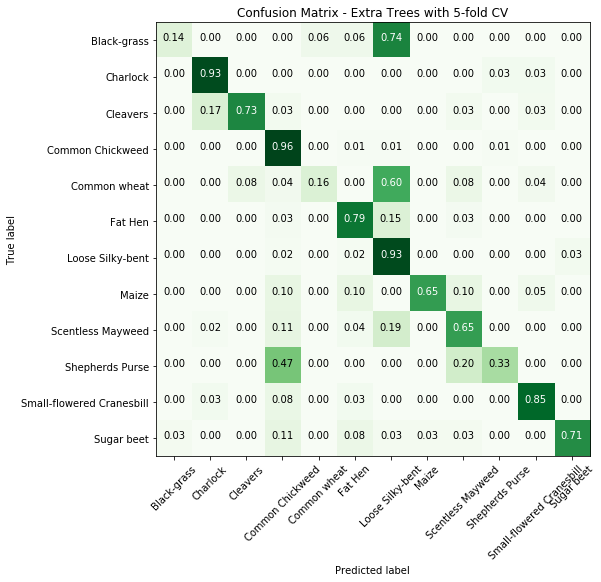

In [12]:
print(etc_grid.best_score_)
print(etc_grid.best_params_)
result = etc_grid.cv_results_

grid_etc_pred = etc_grid.best_estimator_.predict(X_ts)
cr = classification_report(y_ts, grid_etc_pred)
print(cr)

score = accuracy_score(y_ts, grid_etc_pred)
print(score)

cm = confusion_matrix(y_ts, grid_etc_pred)
cm_plot(confusion_matrix(y_ts, grid_etc_pred), classes=sorted(data['class'].unique()), 
       cmap=plt.cm.Greens, cbar=False, normalize=True, 
       title='Confusion Matrix - Extra Trees with 5-fold CV')
plt.show()
# save the grid search results


In [40]:
# save the results

save_pickle(obj=etc_grid, out_file='./pickled_data/etc_grid.pkl.bz2', zip_class=bz2)
save_pickle(obj=rf_grid, out_file='./pickled_data/rf_grid.pkl.bz2', zip_class=bz2)

In [7]:
# load the results
etc_grid = load_pickle('./pickled_data/etc_grid.pkl.bz2', zip_class=bz2)
rf_grid = load_pickle('./pickled_data/rf_grid.pkl.bz2', zip_class=bz2)